<a href="https://colab.research.google.com/github/Koyel-Chakraborty/Temperature-Forecast/blob/main/STL_Forecast_Temperature_Kolkata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels==0.13.0

     |████████████████████████████████| 9.8 MB 5.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.5 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast
from pmdarima import auto_arima
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
sns.set()

In [ ]:
path = 'Kolkata.csv'
df = pd.read_csv(path, index_col='DATE',parse_dates=True)
df_temp = df['TAVG']
df_temp = df_temp.resample('M',closed='left').mean()
df_temp = df_temp[:324]
df_temp_train = df_temp[:300]
df_temp_test = df_temp[300:324]

In [ ]:
res = STL(df_temp[:300], period = 12, robust = True).fit()

In [ ]:
validmodels = auto_arima(df_temp_train - res.seasonal, seasonal=False, return_valid_fits=True)

In [ ]:
validmodels

(ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True),
 ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 ARIMA(order=(0, 1, 0), scoring_ar

In [ ]:
def trend_decision(model):
  if model.with_intercept != False:
    return 't'
  else:
    return 'n'

In [ ]:
rmse_list = []
aic_list = []
for i in range(len(validmodels)):
  stlf = STLForecast(df_temp_train, ARIMA, period = 12, robust = True, model_kwargs=dict(order=validmodels[i].order, trend=trend_decision(validmodels[i])))
  stlf_res = stlf.fit()
  arima = ARIMA(df_temp_train - res.seasonal, order=validmodels[i].order,trend=trend_decision(validmodels[i])).fit() 
  aic_list.append(arima.aic)
  rmse_list.append(rmse(stlf_res.forecast(24),df_temp_test))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

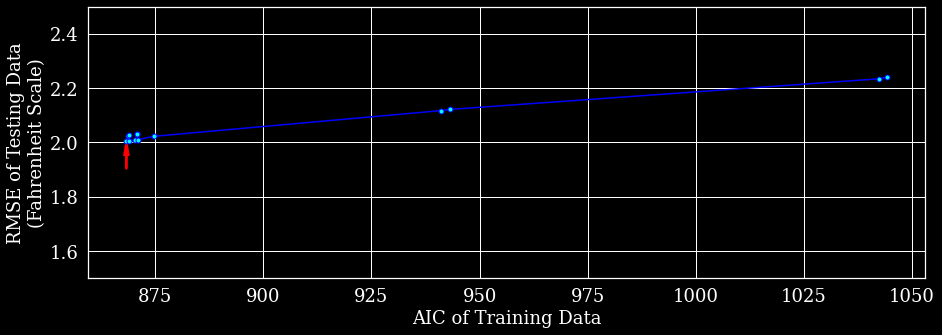

In [ ]:
plt.style.use('dark_background')
#fig,ax=plt.subplots(1,1,figsize=(15,5),facecolor='#fdfd96')
fig,ax=plt.subplots(1,1,figsize=(15,5),facecolor='black')
ax.plot(aic_list, rmse_list, marker = 'o', markerfacecolor = 'cyan', markersize = 5,markeredgecolor='blue',color='blue')
plt.arrow(x=aic_list[0],y=rmse_list[0]-0.1,dx=0,dy=0.1,color='red',length_includes_head = True, lw=2, head_length = 0.05,head_width = 1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(18)
ax.set_ylim(1.5, 2.5)
#ax.set_title('Finding the Best ARIMA Model\n(Kolkata)', fontsize = 16)
ax.set_xlabel('AIC of Training Data',fontsize=18)
ax.set_ylabel('RMSE of Testing Data\n(Fahrenheit Scale)',fontsize=18)
plt.savefig('model_selection_Kolkata.png',dpi=400,facecolor=fig.get_facecolor())


In [ ]:
rmse_aic = pd.DataFrame()
rmse_aic['rmse'] = rmse_list
rmse_aic['aic'] = aic_list

In [ ]:
rmse_aic

,rmse,aic
0,2.003750,868.332678
1,2.024255,868.786946
2,2.025962,868.848962
3,2.006656,868.922838
4,2.007608,870.331773
5,2.029222,870.785674
6,2.031005,870.847668
7,2.009852,870.922183
8,2.022459,874.726066
9,2.117024,941.096538


In [ ]:
validmodels[0].order

(0, 1, 1)

In [ ]:
df_temp_train_diff = df_temp_train.diff()

In [ ]:
df_temp_train_diff[1:]

DATE
1995-02-28    5.026190
1995-03-31    5.507143
1995-04-30    3.366667
1995-05-31   -0.782796
1995-06-30   -0.483871
                ...   
2019-08-31   -1.935484
2019-09-30   -0.381720
2019-10-31   -1.586022
2019-11-30   -2.913978
2019-12-31   -7.473118
Freq: M, Name: TAVG, Length: 299, dtype: float64

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_temp_train_diff[1:])

(-5.910266549564047,
 2.6490249786655843e-07,
 14,
 284,
 {'1%': -3.4535872903895797,
  '10%': -2.5722217283277127,
  '5%': -2.871771355211212},
 958.6775035444571)

In [ ]:
stlf = STLForecast(df_temp_train, ARIMA, period = 12, robust = True, model_kwargs=dict(order=validmodels[0].order,trend=trend_decision(validmodels[0])))
stlf_res = stlf.fit()

In [ ]:
pd.DataFrame(stlf_res.summary().tables[3]).to_csv('kolkata_table_4.csv')

In [ ]:
stlf_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    STL Decomposition and SARIMAX Results                     
==============================================================================
Dep. Variable:                      y   No. Observations:                  300
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -432.166
Date:                Tue, 15 Mar 2022   AIC                            868.333
Time:                        09:19:57   BIC                            875.734
Sample:                    01-31-1995   HQIC                           871.295
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8426      0.034    -25.063      0.000      -0.908      -0.777
sigma2         1.0499      0.054     19.332      0.000       0.943       1.156
===================================================================================
Ljung-Box (L1) (Q):                   1.05   Jarque-Bera (JB):               113.02
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.08
Prob(H) (two-sided):                  0.19   Kurtosis:                         6.01
                                STL Configuration                                
=================================================================================
Period:                            12       Trend Length:                      23
Seasonal:                           7       Trend deg:                          1
Seasonal deg:                       1       Trend jump:                         1
Seasonal jump:                      1       Low pass:                          13
Robust:                          True       Low pass deg:                       1
---------------------------------------------------------------------------------

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

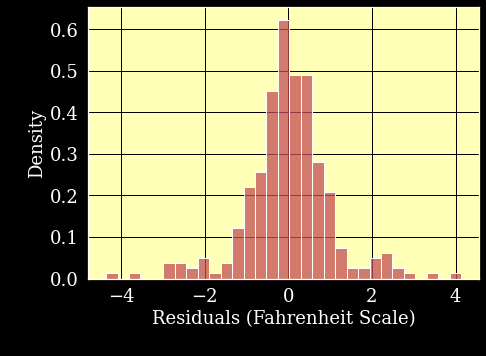

In [ ]:
fig,ax=plt.subplots(1,1, figsize=(7,5))
predicted = stlf_res.get_prediction(start = min(df_temp_train.index), end = max(df_temp_train.index))
resid = df_temp_train[1:]-predicted.summary_frame()['mean'][1:]
sns.histplot(resid, color = 'r',stat='density')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(18)
ax.set_facecolor('#ffffb8')
plt.xlabel('Residuals (Fahrenheit Scale)\n',fontsize=18)
plt.ylabel('\nDensity',fontsize=18)
ax.grid(color='black')
plt.savefig('Kolkataresidual.png',dpi=400)
#plt.title('Histogram of Residuals\n(Kolkata)',fontsize=18)

In [ ]:
resid.std()

1.0266125170912228

In [ ]:
def Faren_to_Celcius(data):
  return ((data-32)/9)*5

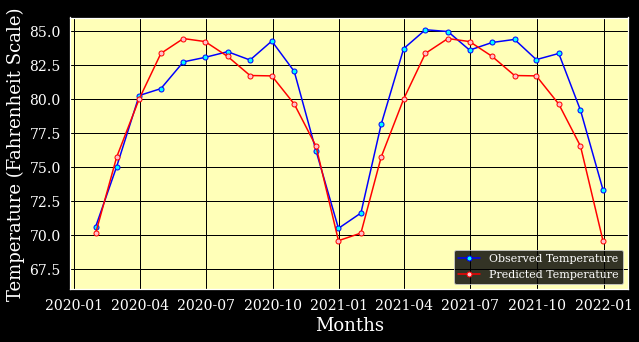

In [ ]:
plt.style.use('dark_background')
fig,ax = plt.subplots(1,1,figsize=(10,5),facecolor='black')
ax.plot(df_temp_test,label='Observed Temperature',color='blue',marker='o',markerfacecolor='cyan',markersize=5)
ax.plot(stlf_res.forecast(24),label='Predicted Temperature',color='red',marker='o',markerfacecolor='pink',markersize=5)
ax.legend()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ax.set_facecolor('#ffffb8')
#ax.set_title('Model Performance on Testing Data\n(Kolkata)', fontsize = 16)
ax.set_xlabel('Months',fontsize=18)
ax.grid(color='black')
ax.set_ylim(66,86)
ax.set_ylabel('Temperature (Fahrenheit Scale)',fontsize=18)
plt.legend(loc='lower right')
plt.savefig('Kolkata_predicted_vs_observed.png',dpi=400, facecolor=fig.get_facecolor())

In [ ]:
rmse(stlf_res.forecast(24),df_temp_test)

2.0037497805246653

In [ ]:
stlf = STLForecast(df_temp, ARIMA, period = 12, robust = True, model_kwargs=dict(order=validmodels[0].order,trend=trend_decision(validmodels[0])))
stlf_res = stlf.fit()

In [ ]:
forecasts_2022 = stlf_res.forecast(12)

Text(0, 0.5, 'Temperature in Degree Celcius')

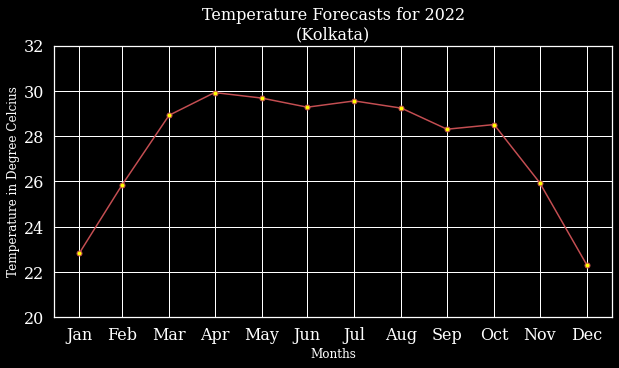

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(Faren_to_Celcius(forecasts_2022), marker = 'o', markerfacecolor = 'yellow', markersize = 5, color='r')
ax.set_xticks(forecasts_2022.index)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
ax.set_ylim(20,32)
ax.set_title('Temperature Forecasts for 2022\n(Kolkata)', fontsize = 16)
ax.set_xlabel('Months')
ax.set_ylabel('Temperature in Degree Celcius')


In [ ]:
df = pd.DataFrame(Faren_to_Celcius(forecasts_2022),columns = ['Temperature'])
df.to_csv("Kolkata_forecasts2022.csv")